<a href="https://colab.research.google.com/github/Prachi817/ML-Basics/blob/main/Linear%20%26%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 08 – Hands‑On Lab: Linear & Logistic Regression  
**Total Points … 70**  

## Overview  
In this lab, you’ll apply **linear regression** and **logistic regression** to a classic **Heart Disease** dataset.
Please go though https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification.ipynb for 5 minutes and discuss it with your lab mate.


## Learning Goals
* Load & explore a real‑world medical dataset.
* Build and evaluate a multivariate **LinearRegression** model.
* Build and evaluate a **LogisticRegression** classifier.
* Interpret regression coefficients, confusion matrix, ROC curve, and AUC.
* Reflect on model assumptions, limitations, and potential bias.

## Prerequisites
* Google account (your `@slu.edu` address is fine).
* Download this starter notebook: `Lab08_Linear_Logistic_Regression.ipynb`.

## Instructions (follow in order)
1. Open Google Colab → **File ▸ Upload notebook** → upload this file.  
2. Rename it to `<Lastname>_<Firstname>_Lab08.ipynb`.  
3. Work through every section, filling each **`# TODO`** cell **(code + markdown)**.  
4. Run **all cells** sequentially and verify that outputs appear.  
5. When finished → **File ▸ Download ▸ Notebook (.ipynb)**.  
6. Submit the notebook on Canvas.

---



In [ ]:

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import time
sns.set(style="whitegrid")
%matplotlib inline


### 1. Load the Heart Disease dataset

In [ ]:

# TODO: Load the dataset directly from GitHub into a pandas DataFrame.
# (Hint: use the raw CSV link)

import pandas as pd

url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"
df = pd.read_csv(url)

print(df.head())
print(df.shape)



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


### 2. Exploratory Data Analysis (EDA)

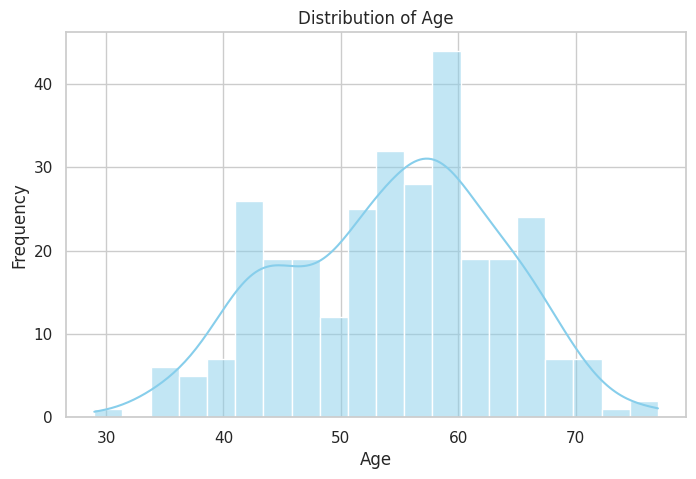

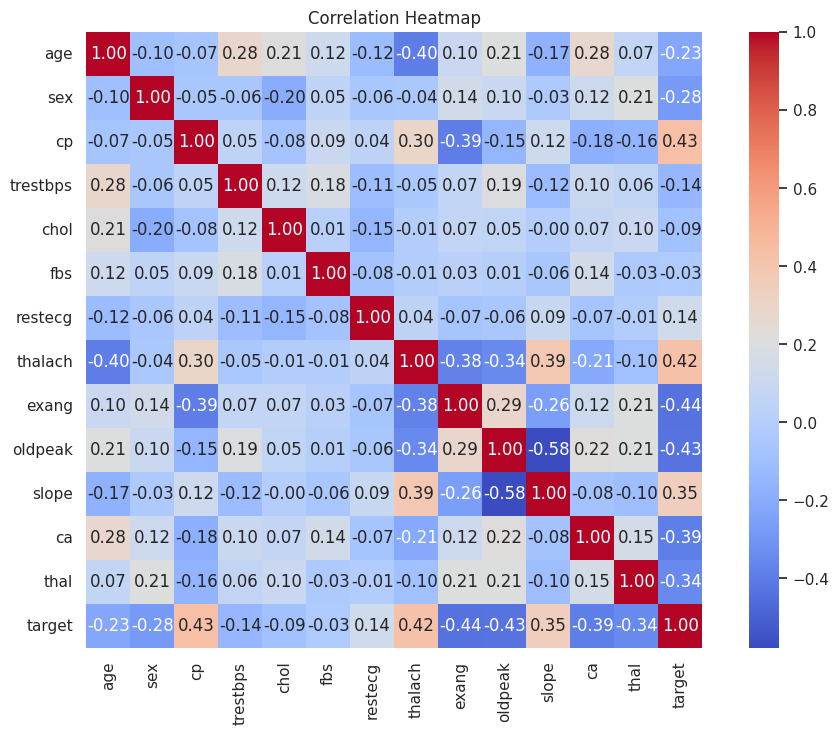

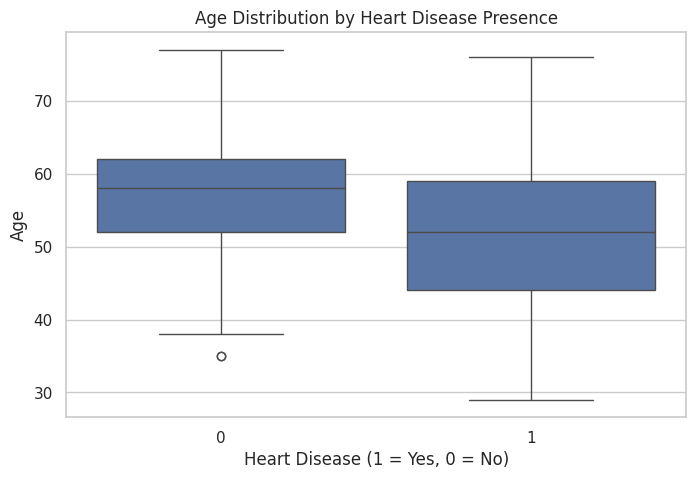

In [ ]:

# TODO: Produce at least two informative plots
# - Distribution of 'age'
# - Correlation heatmap
# - Anything else that helps you understand the data

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: Distribution of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print("\n")

# Plot 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Optional Plot 3: Target vs Age scatter plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Heart Disease Presence")
print("\n")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Age")
plt.show()



## 3. Linear Regression — Predicting Max Heart Rate (`thalach`)

In [ ]:

# TODO: Define X and y for regression
# Predict continuous variable 'thalach' from remaining numerical features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define X and y
X_reg = df.drop(columns=['thalach'])
y_reg = df['thalach']

# Train/test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Fit LinearRegression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)

# Predict and evaluate
y_pred_r = lin_reg.predict(X_test_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print(f"RMSE: {rmse:.2f}, R²: {r2:.3f}")



RMSE: 19.02, R²: 0.415


## 4. Logistic Regression — Predicting Heart Disease (`target`)

Accuracy: 0.8524590163934426




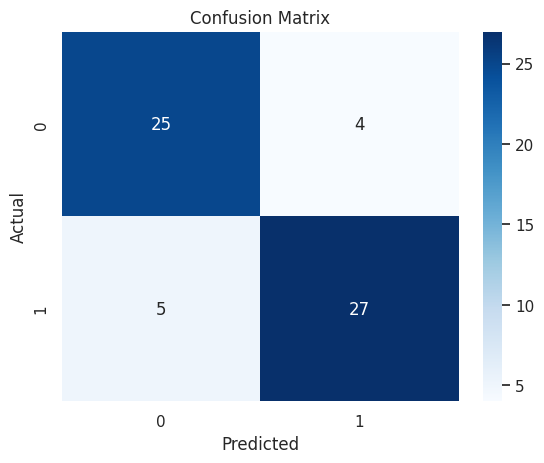

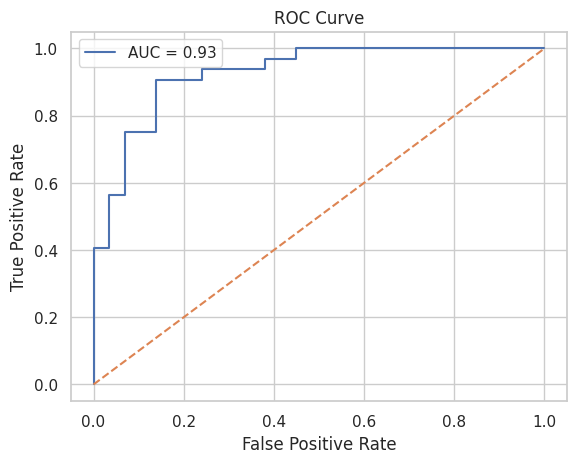



AUC: 0.9267241379310345


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and labels
X_clf = df.drop(columns=['target'])
y_clf = df['target']

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

# Train LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)

# Evaluate accuracy and display confusion matrix
y_pred_c = log_reg.predict(X_test_c)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\n")

cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("\n")

# Compute ROC curve & AUC
y_prob = log_reg.predict_proba(X_test_c)[:, 1]
fpr, tpr, _ = roc_curve(y_test_c, y_prob)
auc_val = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc_val:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("\n")
print("AUC:", auc_val)




### 5. Reflection  
Answer briefly in **markdown**:


1. **Which features seemed most influential in predicting thalach ? How do you know?**  
   Based on the correlation heatmap, age and exang (exercise-induced angina) have strong negative correlations with thalach (max heart rate), while cp (chest pain type) shows a moderate positive correlation. This indicates these features are most influential. This is also supported by the linear regression model's output, which yielded an R² value of 0.415, suggesting moderate explanatory power.

2. **Was scaling necessary for logistic regression? Why or why not?**  
   Yes, scaling was necessary. Logistic regression is sensitive to the scale of input features, especially when gradient descent optimization is used (as in scikit-learn). Without scaling, features with larger magnitudes (like chol or trestbps) could dominate the model and reduce overall accuracy. Standardizing features helped achieve a high classification accuracy ( 85%) and a strong AUC (~0.93), indicating good model performance.

3. **Discuss a potential source of bias in using this dataset for predicting heart disease risk.**  
   A potential source of bias is the demographic imbalance in the dataset. From the age distribution and boxplot by target, we see that age is a strong factor, but if the dataset underrepresents certain age groups, genders, or ethnic backgrounds, the model may perform poorly or unfairly on those populations. This could lead to biased predictions and misclassification in real-world applications.

